**Support Vector Regressor**

The Support Vector Regressor (SVR) is a powerful supervised learning algorithm derived from Support Vector Machines (SVMs), designed for regression tasks where the goal is to predict continuous numerical values. Unlike traditional regression models that aim to minimize the overall prediction error, SVR focuses on finding a function that approximates the data within a certain tolerance (ε), while maintaining maximum generalization ability. In simple terms, it tries to fit the best line or curve within a “margin” that allows small acceptable errors and penalizes larger deviations.

SVR works by mapping the input features into a higher-dimensional space using a kernel function (such as linear, polynomial, or radial basis function – RBF) and then finding the optimal hyperplane that best fits the data. This makes it capable of modeling complex, nonlinear relationships between variables. The key hyperparameters — C (regularization strength), epsilon (ε) (margin of tolerance), and kernel type — control the flexibility and accuracy of the model.

**We implement Support Vector regressor because it is effective for:**

1.   Capturing both linear and nonlinear patterns in data
2.   Handling high-dimensional features efficiently
1.   Providing robust predictions by minimizing overfitting




**Project Setup and Environment Initialization:**
This section initializes the environment, loads essential Python libraries, and sets a fixed random state for reproducibility. It ensures consistency in results, suppresses unnecessary warnings, and displays the current version of scikit-learn used for model development.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
import joblib, warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("scikit-learn version:", sklearn_version)


scikit-learn version: 1.6.1


**Load and Preview the Diabetes Dataset:**
This section loads the Diabetes dataset from scikit-learn as a pandas DataFrame, separates the features (X) and target (y), and displays the first 10 rows. It allows a quick inspection of the data structure and initial values before further analysis.


In [3]:
from sklearn.datasets import load_diabetes
# Load as a pandas DataFrame
data = load_diabetes(as_frame=True)
df = data.frame
# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

#  Display the first 10 rows of the dataset
print(" First 10 rows of the Diabetes dataset:")
display(df.head(10))

 First 10 rows of the Diabetes dataset:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


This section provides an overview of the Diabetes dataset to help understand its structure and basic statistics. It includes information about the data types of each column, the number of non-null entries, and the overall size of the dataset. Additionally, it summarizes key statistical measures such as the mean, standard deviation, minimum, maximum, and quartiles for each feature, allowing a quick assessment of data distribution and variability before proceeding with further analysis.

In [5]:
print(df.info())
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.

This section visualizes the distribution of the target variable in the Diabetes dataset. By plotting a histogram with a kernel density estimate (KDE), it provides insight into the spread, central tendency, and skewness of the target values, helping to identify patterns, potential outliers, or the need for target transformations before modeling.

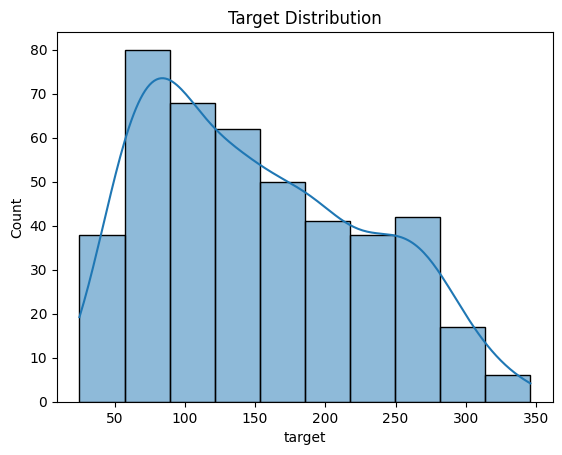

In [6]:
# Target distribution
sns.histplot(y, kde=True)
plt.title("Target Distribution")
plt.show()

This section visualizes the relationship between each input feature and the target variable in the Diabetes dataset. By creating scatter plots for all features against the target, it allows for the identification of patterns, trends, or potential nonlinear relationships. These plots help assess how individual features influence the target and can guide feature selection, transformation, or modeling decisions.

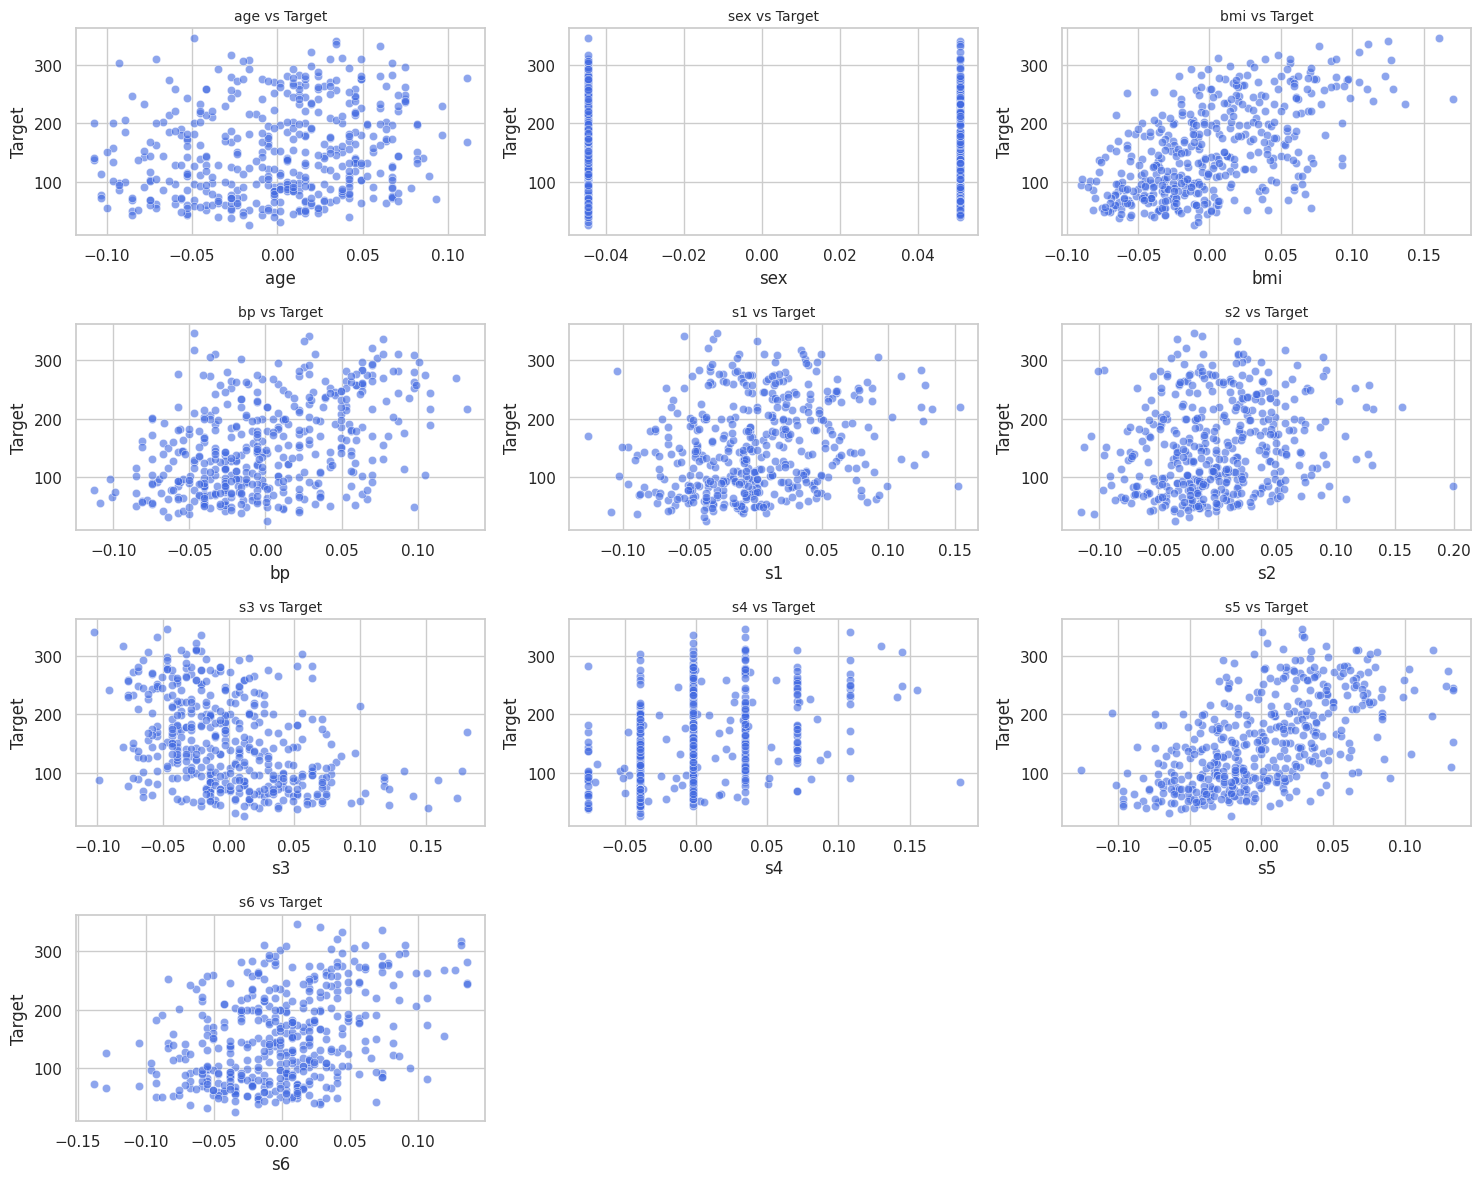

In [10]:
df_plot = df.copy()
# Set general plot style
sns.set(style="whitegrid", context="notebook")
# Plot feature vs target for each column
features = X.columns  # all input features
plt.figure(figsize=(15, 12))
for i, col in enumerate(features, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns grid
    sns.scatterplot(x=df_plot[col], y=df_plot['target'], alpha=0.6, color='royalblue')
    plt.title(f"{col} vs Target", fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Target')
plt.tight_layout()
plt.show()


**Feature Correlation Heatmap:**

This section visualizes the pairwise correlations between all features and the target variable in the Diabetes dataset. By using a heatmap with numeric values, it provides a clear view of the strength and direction of relationships, helping to identify highly correlated features, potential multicollinearity, and the features most strongly associated with the target. This insight is valuable for feature selection and understanding the underlying data structure before modeling.

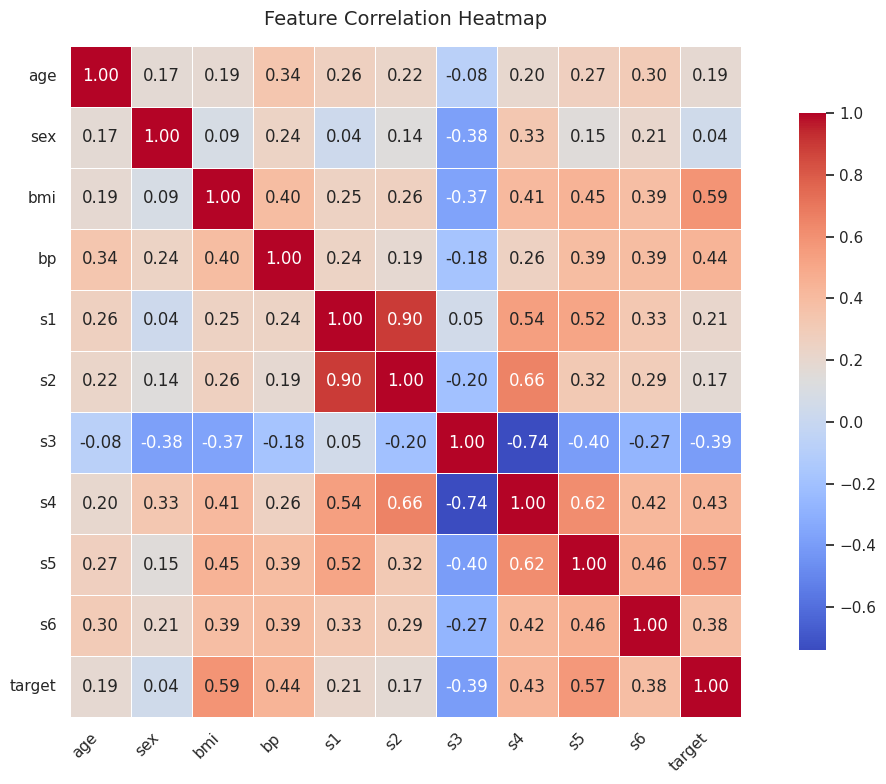

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True
)
plt.title("Feature Correlation Heatmap", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Train-Test Split: This section splits the Diabetes dataset into training and testing subsets to evaluate model performance on unseen data. By allocating 80% of the data for training and 20% for testing, it ensures the model learns patterns from the training set while providing an independent test set to assess generalization. Printing the shapes of the resulting datasets confirms the split and helps verify the data allocation before modeling.**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")


Train shape: (353, 10)
Test shape: (89, 10)


**Feature Scaling:- **This section standardizes the input features using StandardScaler, which transforms the data to have a mean of 0 and a standard deviation of 1. Scaling is particularly important for Support Vector Regressor (SVR) because it is sensitive to the magnitude of feature values. By fitting the scaler on the training set and transforming both training and test sets, the model can learn efficiently and make accurate predictions.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)


**Model Evaluation Metrics:-**This section evaluates the performance of the trained Support Vector Regressor (SVR) model on the test data using key regression metrics.

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # take square root manually
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")



MAE:  56.0295
RMSE: 65.8235
R²:   0.1822


**Predicted vs Actual and Residual Analysis**

This section provides visual diagnostics of the SVR model’s performance. The Predicted vs Actual plot shows how closely the model’s predictions align with the true target values; points along the 45° line indicate accurate predictions. The Residual Distribution plot visualizes the differences between predicted and actual values, helping identify patterns, skewness, or heteroscedasticity. Together, these plots are essential for assessing model fit and detecting potential areas for improvement.

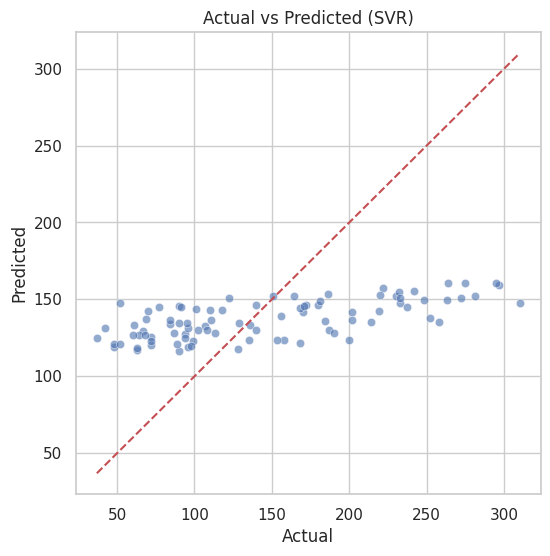

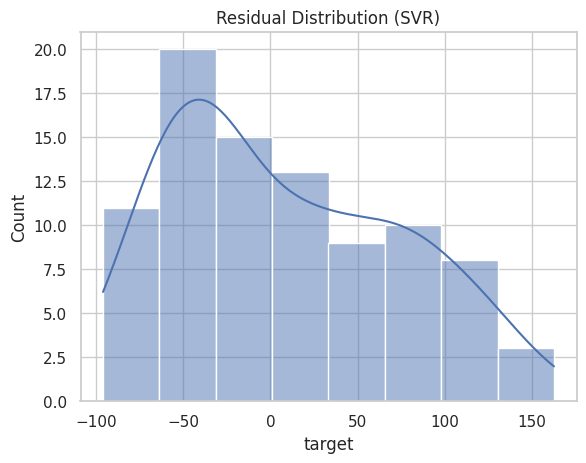

In [19]:
# Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (SVR)")
plt.show()

# Residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (SVR)")
plt.show()


**Hyperparameter Tuning with RandomizedSearchCV**

This section optimizes the Support Vector Regressor (SVR) model by searching for the best combination of hyperparameters. Using RandomizedSearchCV, it tests different values for C (regularization), epsilon (tolerance margin), kernel type, and gamma (kernel coefficient) over multiple cross-validation folds. The search identifies the hyperparameters that minimize the root mean squared error (RMSE), resulting in a more accurate and better-generalized model. The best parameters are then used to create the final tuned SVR estimator.

In [20]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.05, 0.1, 0.5],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

search = RandomizedSearchCV(
    SVR(),
    param_distributions=param_grid,
    n_iter=5,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=2
)

search.fit(X_train_scaled, y_train)
print("Best Parameters:", search.best_params_)

best_svr = search.best_estimator_


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'kernel': 'linear', 'gamma': 'auto', 'epsilon': 0.1, 'C': 1}


**Tuned Model Evaluation**

This section evaluates the performance of the hyperparameter-tuned SVR model on the test dataset. By calculating MAE, RMSE, and R², it provides a quantitative assessment of how much the tuning improved prediction accuracy compared to the baseline model. Printing these metrics allows for a clear comparison of model performance before and after optimization.

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_best = best_svr.predict(X_test_scaled)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))  # take square root manually
r2_best = r2_score(y_test, y_pred_best)

print("Tuned Model Performance:")
print(f"MAE:  {mae_best:.4f}")
print(f"RMSE: {rmse_best:.4f}")
print(f"R²:   {r2_best:.4f}")

Tuned Model Performance:
MAE:  43.3416
RMSE: 54.2200
R²:   0.4451


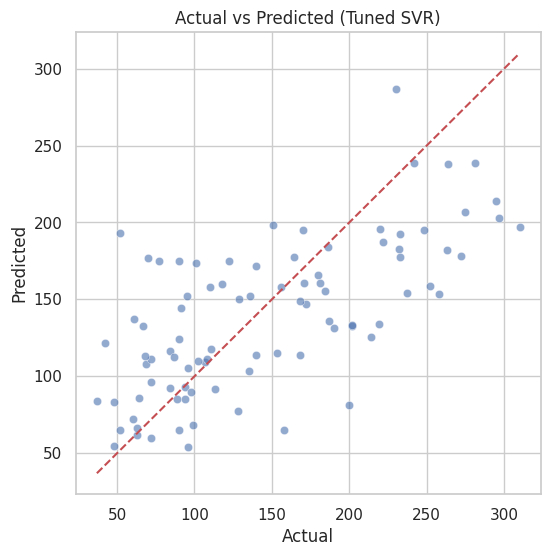

In [23]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Tuned SVR)")
plt.show()


**Learning Curve Analysis:-** This section visualizes the learning curve of the tuned SVR model, showing how the model’s performance changes with increasing training data. By plotting the mean R² scores for both training and validation sets, it helps identify whether the model is underfitting, overfitting, or learning efficiently. This insight can guide decisions on data size, model complexity, and the need for further tuning or feature engineering.

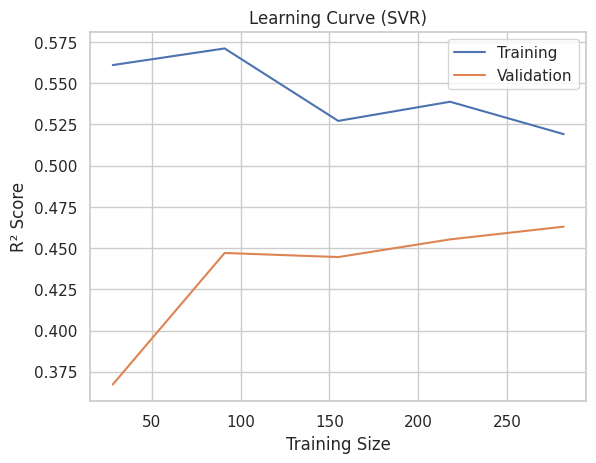

In [24]:
from sklearn.model_selection import learning_curve, validation_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_svr, X_train_scaled, y_train, cv=5, scoring='r2'
)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.title("Learning Curve (SVR)")
plt.legend()
plt.show()


**Feature Importance using Permutation**

This section evaluates the importance of each feature in predicting the target variable using the tuned SVR model. Permutation importance measures how the model’s performance decreases when a feature’s values are randomly shuffled, indicating how much the model relies on that feature. Visualizing these importances with a bar plot helps identify the most influential features, guiding feature selection and providing insight into the model’s decision-making process

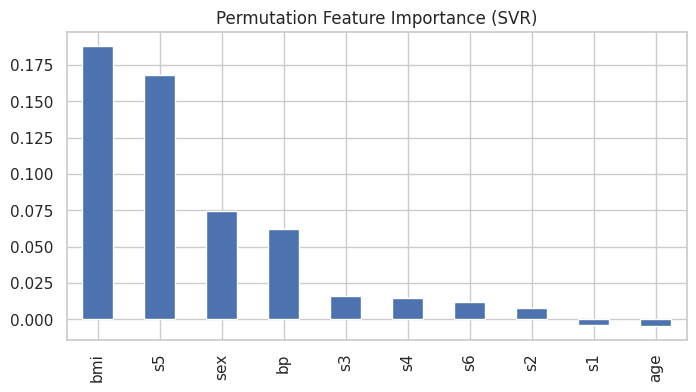

In [25]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_svr, X_test_scaled, y_test, n_repeats=10, random_state=RANDOM_STATE)
importances = pd.Series(result.importances_mean, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(8,4))
plt.title("Permutation Feature Importance (SVR)")
plt.show()


**Save the Trained Model:-** This section saves the final tuned SVR model to a file using joblib. Storing the model allows it to be reloaded later for predictions without retraining, facilitating deployment or future use. The confirmation message ensures that the model has been saved successfully and is ready for use in other scripts or applications.

In [26]:
joblib.dump(best_svr, '/content/svr_best_model.joblib')
print(" SVR model saved successfully!")


 SVR model saved successfully!
